# Data Exploration 

In [47]:
%config IPCompleter.greedy=True
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [39]:
def load_dataset(): # Loads the saved numpy object and returns them as tuple
    
    npzfile = np.load("imageX_Axis.npz",allow_pickle=True)
    x_axis = npzfile['arr_0'] # x - axis
    
    npzfile = np.load("imageY_Axis.npz",allow_pickle=True)
    y_axis = npzfile['arr_0'] # y - axis
    
    return (x_axis,y_axis)


In [40]:
imageX_Axis,imageY_Axis= load_dataset()
print(f"X-axis Length : {len(imageX_Axis)}")
print(f"Y-axis Length : {len(imageY_Axis)}")

X-axis Length : 2102
Y-axis Length : 2102


True Label : PA


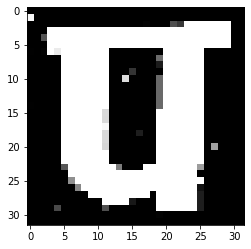

In [42]:
imIndex=4
testImg = imageX_Axis[imIndex]
testImg_Label = imageY_Axis[imIndex]
testImg = testImg.reshape(32,32)
plt.imshow(testImg,cmap="gray")
print(f"True Label : {testImg_Label}")

In [43]:
datasetDf = pd.DataFrame(imageX_Axis,imageY_Axis)

In [53]:
datasetDf.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
PA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PA,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
datasetDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2102 entries, PA to 5
Columns: 1024 entries, 0 to 1023
dtypes: uint8(1024)
memory usage: 2.1+ MB


In [133]:
len(datasetDf)

2102

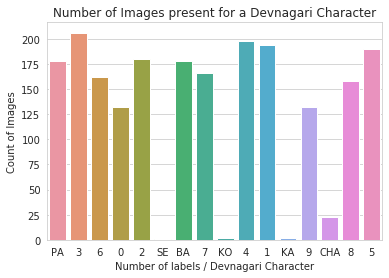

In [75]:
sns.set_style("whitegrid")
sns.countplot(x=datasetDf.index,linewidth=1,)
plt.title('Number of Images present for a Devnagari Character')
plt.xlabel('Number of labels / Devnagari Character')
plt.ylabel('Count of Images')
plt.show()

In [59]:
datasetDf['label'] = datasetDf.index

In [63]:
datasetDf.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
PA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PA
PA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PA
PA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PA
PA,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PA
PA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PA


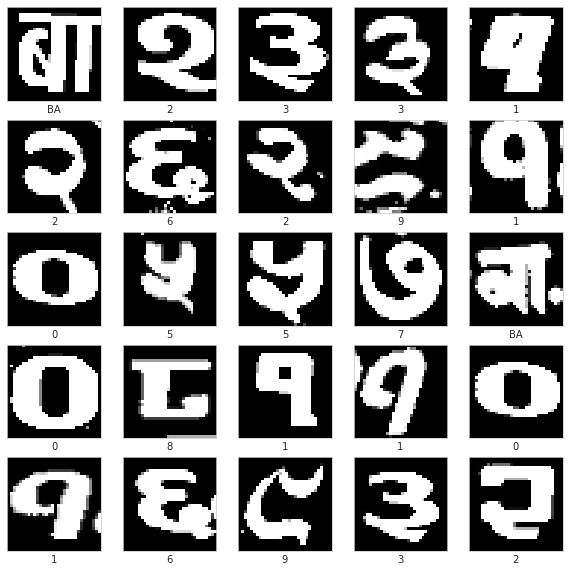

In [147]:
"""let's plot 25 random train set images """
plt.figure(figsize=(10,10))
rand = np.random.randint(1,len(datasetDf),25) #returns a array of random no. from 1 to 1000
# print(rand)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    imgToShow = np.array(datasetDf.iloc[rand[i]])
    plt.xlabel(imgToShow[-1])
    imgToShow = imgToShow[:-1].reshape(32,32)
    plt.imshow(np.int16(imgToShow),cmap=plt.cm.gray)
#     plt.xlabel()


### Looking At images where black pixels are representing the character

In [ ]:
#this dataframe may have such images 
# checking 1st pixel of image ...if has white background it has value 255
corner1_blackLetter = datasetDf.loc[datasetDf[0]==255]
corner2_blackLetter = datasetDf.loc[datasetDf[31]==255]
corner3_blackLetter = datasetDf.loc[datasetDf[992]==255]
corner4_blackLetter = datasetDf.loc[datasetDf[1023]==255]
corner_white_pixel1 = pd.merge(corner1_blackLetter,corner2_blackLetter,how="inner")
corner_white_pixel2 = pd.merge(corner3_blackLetter,corner4_blackLetter,how="inner")
corner_white_pixel = pd.merge(corner_white_pixel1,corner_white_pixel2,how="inner")
corner_white_pixel.head()

[21 33 11 20 36 12  4 23 32 32 17 16 13 30  8 25 28  4 31 20  7  4  5 34
 31]


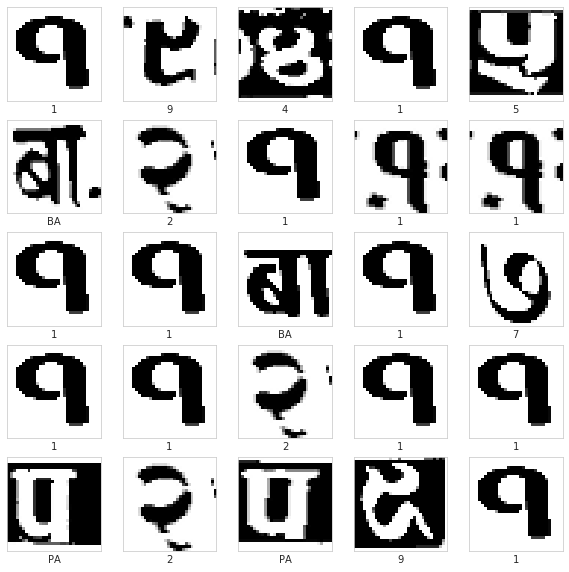

In [158]:
"""let's plot 25 random train set images """
plt.figure(figsize=(10,10))
rand = np.random.randint(1,37,25) #returns a array of random no. from 1 to 1000
print(rand)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    imgToShow = np.array(corner_white_pixel.iloc[rand[i]]) # a row from the 
    plt.xlabel(imgToShow[-1])

    imgToShow = imgToShow[:-1].reshape(32,32)
    plt.imshow(np.int16(imgToShow),cmap='gray')
#     plt.xlabel()
